In [140]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [141]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
colnames = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','class']
iris_df = pd.read_csv("iris.data", names=colnames, header=None)
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [116]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
class                150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [117]:
import math
NNH = KNeighborsClassifier(n_neighbors = 12)

In [69]:
iris_df.shape

(150, 5)

In [142]:
iris_df.describe()
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [120]:
iris_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [143]:
y = iris_df[["class"]]
y
y = pd.get_dummies(y, drop_first=True)
# as diagnoisis is = M or B
y


,class_Iris-versicolor,class_Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [158]:
# for i in range(len(iris_df)):
#     print("sepal_length_class_Iris-versicolor",iris_df["sepal length (cm)"].corr(y["class_Iris-versicolor"]))
#     print("sepal_length_class_Iris-virginica",iris_df["sepal length (cm)"].corr(y["class_Iris-virginica"]) ) 
#     print("sepal_width_class_Iris-virginica",iris_df["sepal width (cm)"].corr(y["class_Iris-virginica"]) )
#     print("sepal_width_class_Iris-versicolor",iris_df["sepal width (cm)"].corr(y["class_Iris-versicolor"]) )
#     print ("petal length_class_Iris-versicolor", iris_df["petal length (cm)"].corr(y["class_Iris-versicolor"]))
#     print("petal length_class_Iris-virginica", iris_df["petal length (cm)"].corr(y["class_Iris-virginica"]))
#     print("petal width_class_Iris-versicolor", iris_df["petal width (cm)"].corr(y["class_Iris-versicolor"]))
#     print("petal width_class_Iris-virginica", iris_df["petal width (cm)"].corr(y["class_Iris-virginica"]))
    
    
# from above we can see that the correlation between sepal_length and class_Iris-versicolor is 0.0.79 ,


iris_df["class"].unique()




iris_df1=iris_df.iloc[:,0:4].corr()
#corr use for correlation between 0-1 
iris_df1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [159]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

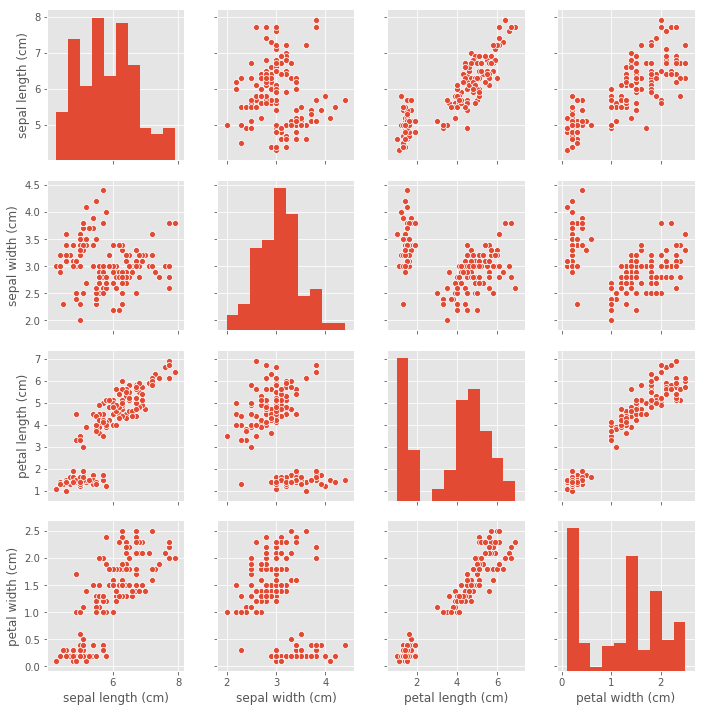

In [162]:
sns.pairplot(iris_df)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [167]:
X = iris_df.drop("class", axis = 1)
y = iris_df["class"]

In [171]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [189]:
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print("accuracy at k = 12", pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"]))

NNH1 = KNeighborsClassifier(n_neighbors = 3)
NNH1.fit(X_train, y_train)
predicted_labels = NNH1.predict(X_test)
print("accuracy at k = 3", pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"]))



NNH2 = KNeighborsClassifier(n_neighbors = 5)
NNH2.fit(X_train, y_train)
predicted_labels = NNH2.predict(X_test)
print("accuracy at k = 3", pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"]))




NNH3 = KNeighborsClassifier(n_neighbors = 9)
NNH3.fit(X_train, y_train)
predicted_labels = NNH3.predict(X_test)
print("accuracy at k = 3", pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"]))

accuracy at k = 12             0
accuracy  0.9
accuracy at k = 3             0
accuracy  0.9
accuracy at k = 3             0
accuracy  0.9
accuracy at k = 3             0
accuracy  0.9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [213]:
for i in range(1,20):
    if i%2 != 0:
        NNH2 = KNeighborsClassifier(n_neighbors = i)
        NNH2.fit(X_train, y_train)
        predicted_labels = NNH2.predict(X_test)
        accuracy = pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"])
        print("accuracy at %s %s" % (i, pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"])))
        print("miss classification error",1-accuracy[0][0])
              

accuracy at 1             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 3             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 5             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 7                  0
accuracy  0.866667
miss classification error 0.1333333333333333
accuracy at 9             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 11             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 13             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 15             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 17             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 19             0
accuracy  0.9
miss classification error 0.09999999999999998


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

accuracy at 1             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 3             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 5             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 7                  0
accuracy  0.866667
miss classification error 0.1333333333333333
accuracy at 9             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 11             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 13             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 15             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 17             0
accuracy  0.9
miss classification error 0.09999999999999998
accuracy at 19             0
accuracy  0.9
miss classification error 0.09999999999999998
range(1, 20)


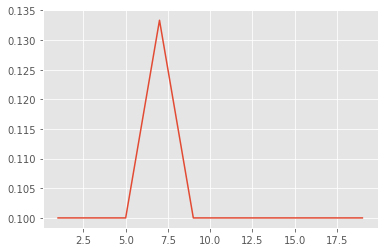

In [225]:
missclassification_error = [] 
range_val = []
for i in range(1,20):
    if i%2 != 0:
        NNH2 = KNeighborsClassifier(n_neighbors = i)
        NNH2.fit(X_train, y_train)
        predicted_labels = NNH2.predict(X_test)
        accuracy = pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"])
        print("accuracy at %s %s" % (i, pd.DataFrame(data=[accuracy_score(y_test, predicted_labels)], index = ["accuracy"])))
        print("miss classification error",1-accuracy[0][0])  
        missclassification_error.append(1-accuracy[0][0])
        range_val.append(i)

        
print(range(1,20))
        
# k_vs_missclassificationerror_df = pd.DataFrame({'A': missclassification_error, 'B': range_val})

# k_vs_missclassificationerror_df

from matplotlib import pyplot as plt 
  
# x-axis values 
y = missclassification_error
  
# Y-axis values 
x = range_val
  
# Function to plot 
plt.plot(x,y) 
  
# function to show the plot 
plt.show() 




        

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [226]:
colnames = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','Species']
iris_df = pd.read_csv("iris.data", names=colnames, header=None)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [244]:
#Check the dataset
y = iris_df[["Species"]]
y
y = pd.get_dummies(y, drop_first=True)
# as diagnoisis is = M or B

X = iris_df.drop("Species", axis = 1)
y = iris_df["Species"]

X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2cb8b898>,
      dtype=object)

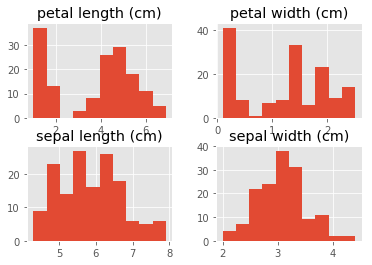

In [239]:

iris_df.hist()

In [0]:
#Drop Id variable from data 5

### Question 12 
Find Correlation among all variables and give your insights 

In [245]:
iris_df["Species"].unique()




iris_df1=iris_df.iloc[:,0:4].corr()
#corr use for correlation between 0-1 
iris_df1


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


### Split data in Training and test set in 80:20.

In [247]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [250]:
# Use StandardScaler or similar methods

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


### Question 14 
Train and Fit NaiveBayes Model

In [252]:
#Fit the model


model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [253]:
#Predict
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [258]:
# show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]])

In [259]:
# show accuracy

model_score = model.score(X_test, y_test)
model_score

0.8333333333333334

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779